In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics

from sklearn.neighbors import KNeighborsClassifier as KNN

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
df['Outcome'].value_counts() #Classes are balanced

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
'''metadata -> Attributes'''

In [65]:
#2
age_mean = df['Age'].mean()
age_sd = df['Age'].std()
print('Mean of age -> ',age_mean)
print('Standard deviation of age -> ',age_sd) # 2nd qn not complete

Mean of age ->  33.240885416666664
Standard deviation of age ->  11.76023154067868


In [66]:
df_X = df.drop('Outcome', axis = 1)
df_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [67]:
df_Y = df['Outcome']
df_Y = pd.DataFrame(df_Y)

In [68]:
scaler = StandardScaler()
df_X_scaled = scaler.fit_transform(df_X)
#df_Y_scaled = scaler.fit_transform(df_Y)

In [73]:
#5
X_train, X_test, Y_train, Y_test = train_test_split(df_X_scaled, df_Y, test_size = 0.3,random_state = 0)

In [74]:
print('X train -> ',X_train.shape)
print('X test-> ',X_test.shape)
print('Y train -> ',Y_train.shape)
print('Y test -> ',Y_test.shape)

X train ->  (537, 8)
X test->  (231, 8)
Y train ->  (537, 1)
Y test ->  (231, 1)


In [75]:
model = LogReg()

In [77]:
model.fit(X_train,Y_train.squeeze())

LogisticRegression()

In [141]:
y_pred = model.predict(X_test)

In [159]:
cf_mat = confusion_matrix(Y_test, y_pred)
print('Confusion matrix is', cf_mat)

Confusion matrix is [[141  16]
 [ 35  39]]


<AxesSubplot:>

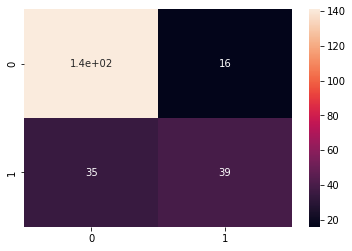

In [160]:
sb.heatmap(cf_matrix, annot=True)

In [161]:
accuracy = (cf_mat[0,0] + cf_mat[1,1])/np.sum(cf_mat)

In [162]:
accuracy #test accuracy is high which implies that the model is generalizing well for new examples.

0.7792207792207793

In [163]:
tp_rate = cf_mat[0,0]/np.sum(cf_mat[:,0])
fp_rate = 1-tp_rate

In [164]:
print(tp_rate)
print(fp_rate)

0.8011363636363636
0.19886363636363635


In [165]:
tn_rate = cf_mat[0,1]/np.sum(cf_mat[:,1])

In [166]:
tn_rate

0.2909090909090909

In [179]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(np.squeeze(Y_test),y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

In [180]:
fpr.shape

(72,)

In [181]:
tpr.shape

(72,)

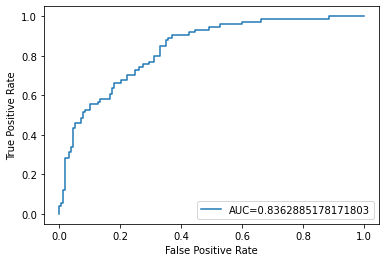

In [182]:
plt.plot(fpr,tpr,label="AUC="+str(auc)) 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [132]:
'''The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into
categories.'''
''' if AUC which is area under curve is close to 1 that means that our model is doing a good job '''
'''In the above plot AUC is closer to 1,hence our model is doing a pretty good job'''

'In the above plot AUC is closer to 1,hence our model is doing a pretty good job'